In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random
import os
import cv2

Using TensorFlow backend.


### Load dataset

In [2]:
def load_data(img_folder):
    """Load dataset."""

    class_index = 0
    IMAGE_SIZE = 32

    X_data = []
    y_data = []
    dirs = [path for path in os.listdir(img_folder) if path != '.DS_Store']
    for dir1 in dirs:
        files = os.listdir(os.path.join(img_folder, dir1))
        for file in files:
            image_path = os.path.join(img_folder, dir1, file)

            # Read Image as numbers
            image = cv2.imread(image_path)
            
            # Resize the images
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            
            # Rescale the images
            image = image / 255.0

            X_data.append(image)
            y_data.append(class_index)

        class_index += 1

    # Shuffle the dataset
    temp = list(zip(X_data, y_data))
    random.shuffle(temp)
    X_data, y_data = zip(*temp)

    # Convert list into numpy array
    X_data = np.asarray(X_data, dtype="float32")
    y_data = np.asarray(y_data, dtype="int32")
    
    return X_data, y_data

In [10]:
# Specify the path to the dataset!
X_train, y_train = load_data(img_folder='./data/train')
X_test, y_test = load_data(img_folder='./data/val')

### Visualise images

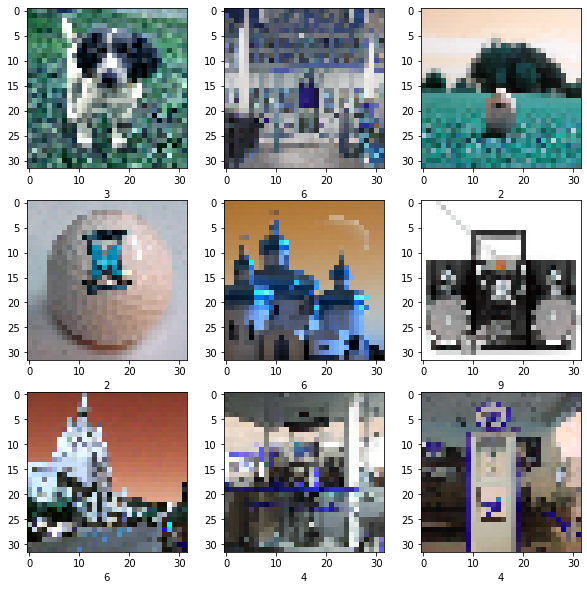

In [11]:
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
    plt.grid(False)
plt.show()
fig.savefig("./image.pdf")

In [12]:
n_classes = 10

# one-hot encoding using keras' numpy-related utilities
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

### Build a CNN model

#### Experiment 1

In [13]:
# This is related to the first experiment in the report
# building a linear stack of layers with the sequential model (Experiment 1)
model1 = Sequential()

# convolutional layer
model1.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model1.add(MaxPool2D(pool_size=(2, 2)))

# convolutional layer
model1.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(500, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(250, activation='relu'))
model1.add(Dropout(0.3))
# output layer
model1.add(Dense(10, activation='softmax'))

In [14]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 75)        2100      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 125)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)              

In [ ]:
# compiling the sequential model (Experiment 1)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Train on 9469 samples, validate on 3925 samples
Epoch 1/10
1536/9469 [===>..........................] - ETA: 1:00 - loss: 2.3132 - accuracy: 0.1178

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Experiment 2

In [ ]:
# This is related to the second experiment in the report

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
print("Evaluate model on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)